# Working with Images
---
**Tasks**
- Loading and storing images in a tensor, matrix and vector
- Conversion of a color image into a black and white one
- putting a frame around an image
- Adding Gaussian noise to an image

In [3]:
#IMPORT
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from sklearn.datasets import load_diabetes
%matplotlib inline

## Set a seed for the random number generator
np.random.seed(100)

In [4]:
## We are using these lines of code several time.
## We are making this a function therefore. This also take care of clippign warnings.
def display_image(arr_image,color_map=None,dim=(16,24)):
    arr_image = (arr_image - np.min(arr_image))/(np.max(arr_image) - np.min(arr_image))
    arr_image = np.uint8(arr_image*255)
    plt.figure(figsize=dim)
    plt.axis('off')
    plt.imshow(arr_image, cmap=color_map)
    plt.show()


Success! Just finished reading an image  into a tensor of order (1500, 2000, 3) 



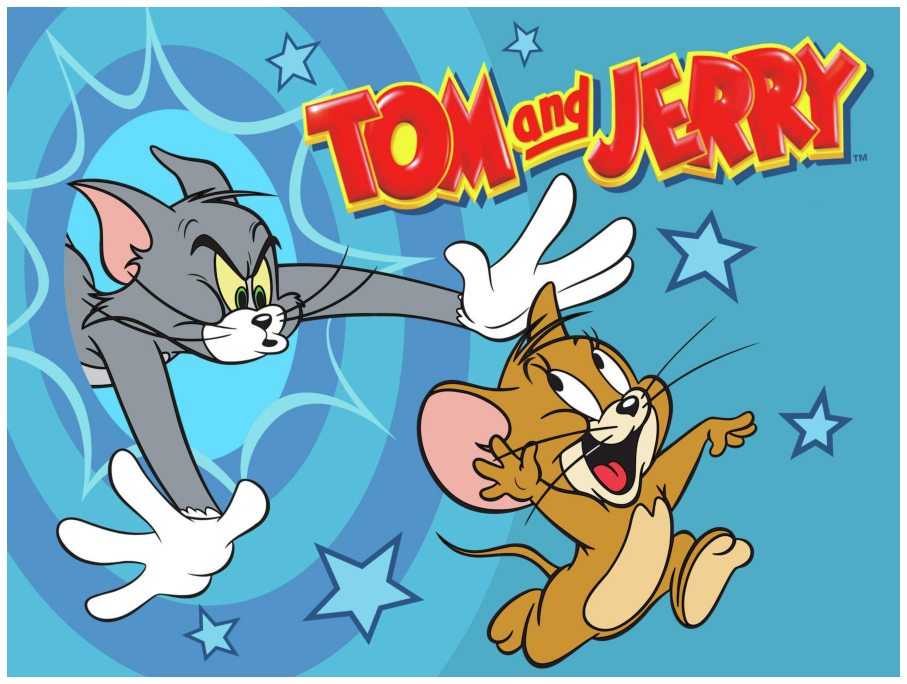

In [5]:
# Load the image
pix = mpimg.imread("./images/TomNJerry.jpeg") # OR any other images of yooru choice
print("Success! Just finished reading an image  into a tensor of order", pix.shape, "\n")

display_image(pix)

Text(0.5, 1.0, 'Blue channel')

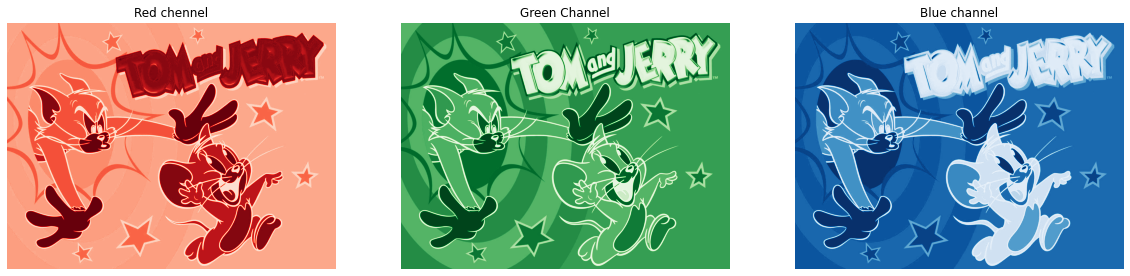

In [6]:
# Lets us see the RGB channels of the image. Can you see the difference?

fig = plt.figure(figsize=(20, 30))

# The red channel
fig.add_subplot(1, 3, 1)
plt.imshow(pix[:,:,0],cmap='Reds')
plt.axis('off')
plt.title("Red chennel")

# The green channel
fig.add_subplot(1, 3, 2)
plt.imshow(pix[:,:,1],cmap='Greens')
plt.axis('off')
plt.title("Green Channel")

# The blue channel
fig.add_subplot(1, 3, 3)
plt.imshow(pix[:,:,2],cmap='Blues')
plt.axis('off')
plt.title("Blue channel")

In [5]:
print("What kind of datatype holds an image:",type(pix))

What kind of datatype holds an image: <class 'numpy.ndarray'>


In [7]:
# Vectorization
X = pix.reshape(-1,3)/255.0 
print("After vectorizing (RGB channels as vectors) the image, the dimensions are:", X.shape )

After vectorizing (RGB channels as vectors) the image, the dimensions are: (3000000, 3)


<div class="alert alert-block alert-danger"><b>Q: </b> 
    Why Should we divide pix by 255 here?
</div>

### Conversion to a black & white image

This is accomplished by taking a weighted average (or weighted sum) of the RGB values.

[Check this out](https://www.prasannakumarr.in/journal/color-to-grayscale-python-image-processing
)

Order of the gray-scale image matrix: (1500, 2000)


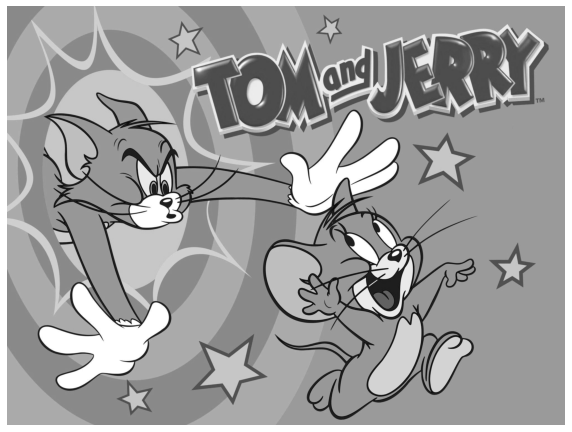

In [63]:
## Converting a color image to a black-n-white
color_weight = [0.2125, 0.7154, 0.0721]; # LUMA-REC.709
## color_weight = [1, 0, 0] # Try this
## Weighted sum of R, G and B pixel values is used to convert from color to black and white.
## Note that conversion to gray-scale is not unique
pix_gray = np.dot(pix[..., 0:3], color_weight) 

print ("Order of the gray-scale image matrix:", pix_gray.shape)
display_image(pix_gray,color_map='gray')
#plt.figure(figsize=(12,24))
#plt.axis('off')
#plt.imshow(pix_gray, cmap='gray')
#plt.show()

### Adding a frame around a B&W image

Order of the framed gray-scale image matrix: (1540, 2040)


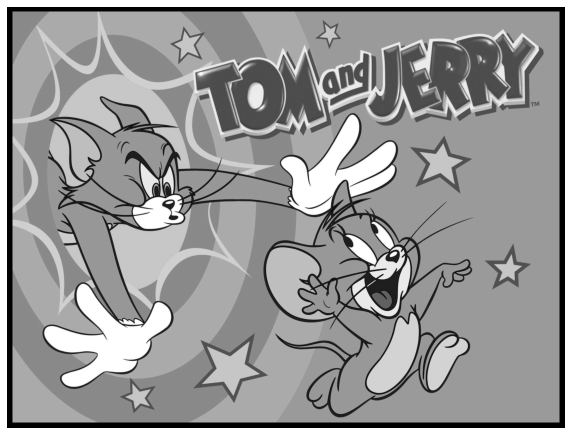

In [65]:
x_margin = 20
y_margin = 20

# Create a frame around the monochrome image
larger_size = np.add(pix_gray.shape, tuple([2*x_margin,2*y_margin]))
pix_framed = np.zeros(larger_size)
print ("Order of the framed gray-scale image matrix:", pix_framed.shape)

## Assign the image to a submatrix of the frames image
pix_framed[x_margin:pix_gray.shape[0]+x_margin, 
           y_margin:pix_gray.shape[1]+y_margin] = pix_gray

display_image(pix_framed, color_map='gray')

### Adding Gaussian noise to a B&W image
---

#### Normal (Gaussian) Distribution
$$\large{
p(x) = \frac{1}{\sqrt{ 2 \pi \sigma^2 }}e^{ - \frac{ (x - \mu)^2 } {2 \sigma^2} },
}
$$
where $\mu$ is the mean and $\sigma$ is the standard deviation of the  distribution.            

 <img src="./images/NormalDistribution.png" width="60%" />
 
 [Image source: W3C School](https://www.w3schools.com/statistics/statistics_normal_distribution.php)

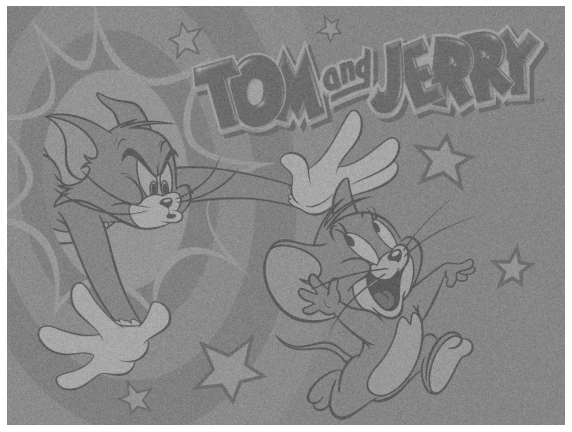

In [84]:
# Add gaussian noise to the image
gauss_noise =  np.random.normal(0.5,0.25, pix_gray.shape)
noisy_pix= pix_gray/255 + gauss_noise 
# Have a balance between the pixel intensity and noise

display_image(noisy_pix,color_map='gray')

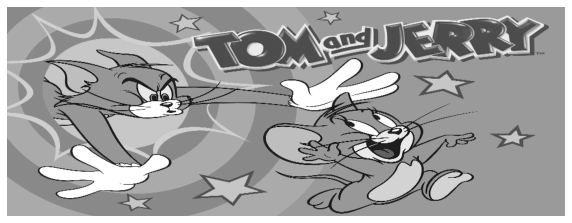

In [109]:
rowSlice=slice(0,-1,4)
colSlice=slice(0,-1,2)
display_image(pix_gray[rowSlice,colSlice],color_map='gray')

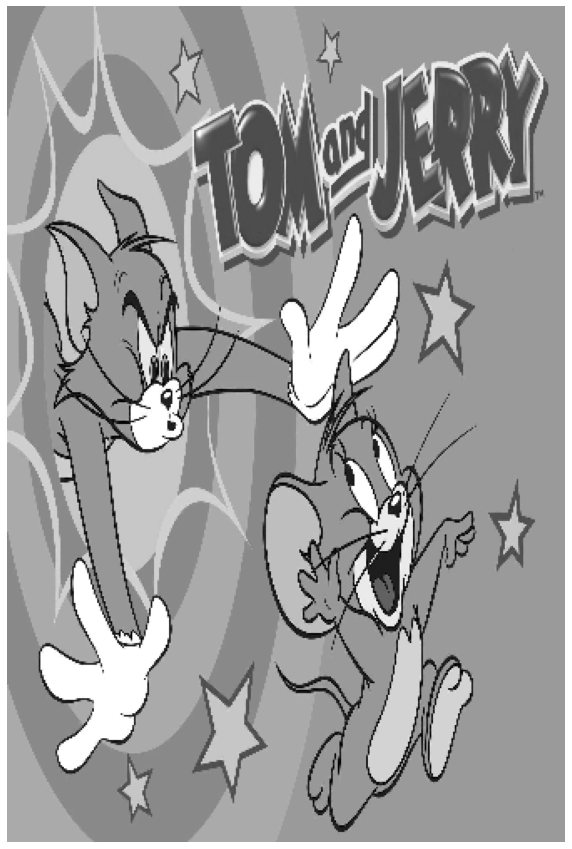

In [110]:
rowSlice=slice(0,-1,3)
colSlice=slice(0,-1,6)
display_image(pix_gray[rowSlice,colSlice],color_map='gray')

### Question

How can you convert a color-video a black and white video? It should be noted that MoviePy package could be used to extract the set of all image frames into a tensor of appropriate order.